In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import seaborn as sns
import os

In [167]:
df[(df.meter_serial_number_consumer_id=='1026227684_17279')]#['kWhs'].mean()# . & ~(df.year==2012)

9.148387096774194

In [174]:
meta_df[meta_df.meter_serial_number_consumer_id=='1318826821_63021']

,consumer_id,meter_serial_number,vending_category_name,district_id,district,installation_date,Matched_2_location,meter_serial_number_consumer_id,installation_year
761049,63021,1318826821,"[11. Non Residential, 2. CS T1 Tx AR STS]",[12],[KIGALI],2008-02-17 07:44:10,YES,1318826821_63021,2008


In [5]:
# meta_df['district_count'] = meta_df.district.apply(lambda x: len(x))
# meta_single_dists = meta_df[~(meta_df['district_count']>1)]
# meta_single_dists['districts_unpacked'] = meta_single_dists.district.apply(lambda x: x[0])
# meta_single_dists['districts_unpacked'] = meta_single_dists['districts_unpacked'].str.upper()

# plt.figure(figsize = (11,8))
# ax = sns.countplot(x="districts_unpacked", data=meta_single_dists, color="b")
# ax.set_xlabel('District', fontsize=16)
# ax.set_ylabel('Number of customers', fontsize=16)
# ax.set_title(f'Number of customers per district', fontsize=20)
# plt.setp( ax.xaxis.get_majorticklabels(), rotation= 45 , ha="right" , rotation_mode="anchor") ;

In [4]:
# meta_count = meta_df.groupby(['installation_year'])['meter_serial_number_consumer_id'].count()

# plt.figure(figsize = (11,8))
# ax = sns.barplot(x=meta_count.index, y=meta_count.values,color="b")
# ax.set_xlabel('Connection Year', fontsize=16)
# ax.set_ylabel('Number of connections', fontsize=16)
# ax.set_title(f'Number of new connections per year', fontsize=20)
# plt.setp( ax.xaxis.get_majorticklabels(), rotation= 45 , ha="right" , rotation_mode="anchor") ;

In [2]:
%%time

low_customer_tariffs = {'date': ['01/07/2012', '31/08/2015', '01/09/2015', '31/12/2016', '01/01/2017', '13/08/2018', '20/01/2020'],
                        'price (rwf)': [134, 134, 182, 182, 89, 89, 89]}
low_tarrif_df = pd.DataFrame(data=low_customer_tariffs)
low_tarrif_df['date'] = pd.to_datetime(
    low_tarrif_df['date'], format='%d/%m/%Y')
low_tarrif_df.set_index(['date'], inplace=True)

medium_customer_tariffs = {'date': ['01/07/2012', '31/08/2015', '01/09/2015', '31/12/2016', '01/01/2017', '13/08/2018', '20/01/2020'],
                         'price (rwf)': [134, 134, 182, 182, 182, 182, 182]}
medium_tarrif_df = pd.DataFrame(data=medium_customer_tariffs)
medium_tarrif_df['date'] = pd.to_datetime(
    medium_tarrif_df['date'], format='%d/%m/%Y')
medium_tarrif_df.set_index(['date'], inplace=True)

high_customer_tariffs = {'date': ['01/07/2012', '31/08/2015', '01/09/2015', '31/12/2016', '01/01/2017', '13/08/2018', '20/01/2020'],
                         'price (rwf)': [134, 134, 182, 182, 189, 189, 189]}
high_tarrif_df = pd.DataFrame(data=high_customer_tariffs)
high_tarrif_df['date'] = pd.to_datetime(
    high_tarrif_df['date'], format='%d/%m/%Y')
high_tarrif_df.set_index(['date'], inplace=True)


# customer payments
payts_dir = '/mnt/nfs/work1/jtaneja/jmugyenyi/REG_consumption_data'
payts_datafile = 'smoothed_payments_06142021.pck'
payts_fp = os.path.join(payts_dir, payts_datafile)
payts_df = pd.read_pickle(payts_fp)
payts_df['trans_period'] = pd.to_datetime(payts_df[['year', 'month']].assign(day=lambda x: x['month'].apply(
    lambda y: 31 if y in [1, 3, 5, 7, 8, 10, 12] else (30 if y in [4, 6, 9, 11] else (28 if y == 2 else np.nan)))))

# customer consumption
consumption_dir = '/mnt/nfs/work1/jtaneja/jmugyenyi/REG_consumption_data/smoothed_folder'
consumption_datafile = 'merged_smoothed_monthly_by_meternumber_consumerid_march032021.pck'
consumption_fp = os.path.join(consumption_dir, consumption_datafile)
df = pd.read_pickle(consumption_fp)
df['trans_period'] = pd.to_datetime(df[['year', 'month']].assign(day=lambda x: x['month'].apply(
    lambda y: 31 if y in [1, 3, 5, 7, 8, 10, 12] else (30 if y in [4, 6, 9, 11] else (28 if y == 2 else np.nan)))))

# customer meta info
meta_dir = '/mnt/nfs/work1/jtaneja/jmugyenyi/REG_consumption_data/metadata_folder'
meta_datafile = 'REG_metadata_March_3_2021.pck'
meta_fp = os.path.join(meta_dir, meta_datafile)
meta_df = pd.read_pickle(meta_fp)
meta_df['meter_serial_number_consumer_id'] = meta_df['meter_serial_number'].astype(
    str) + '_' + meta_df['consumer_id']
meta_df['installation_year'] = meta_df.installation_date.dt.year
b = ['10. Residential', '2. T1 Tx FC1 AR STS']
res_meta = meta_df[meta_df.vending_category_name.apply(
    lambda y: any(x in b for x in y))]
os.system('say "Your program has now finished"')

CPU times: user 43.2 s, sys: 11 s, total: 54.3 s
Wall time: 55.9 s


32512

In [3]:
# Variables, for selecting consumption categories
tariff_date_1 = datetime.date(2015, 9, 1)  # 1st tariff change
tariff_date_2 = datetime.date(2017, 1, 1)  # 2nd tariff change
legend_2015 = ['2010 & prior', '2011','2012','2013','2014']
legend_2017 = ['2010 & prior', '2011','2012','2013','2014', '2015']
tariff_date = tariff_date_1
if tariff_date == tariff_date_1:
    end_year = tariff_date.year
    rev_legend = legend_2015
elif tariff_date == tariff_date_2:
    end_year = tariff_date.year-1
    rev_legend = legend_2017
period = 1
time_period = datetime.timedelta(days=(period*365))
before_tariff = (tariff_date - time_period).strftime('%Y-%m-%d')

In [4]:
# c = ['KIGALI']
# res_meta = res_meta[~(res_meta.district.apply(
#     lambda y: any(x in c for x in y)))]

# Low consumers

In [4]:
%%time
# quartiles for low consumption

# lists
quartiles = [0.25, 0.50, 0.75]          # inter-quartile range
lower_quat_list = []                 # lower quartile kWhs
median_list = []                     # median kWhs
upper_quat_list = []                 # upper quartile kWhs

# number of customers per installation year
customers_per_conn_year = []
# number of customers per installation year per transaction month
customer_per_month_per_conn_year = {}
customers_list_per_conn_year = {}  # list customers in each connection year cohort
years_list = [2010, 2011, 2012,
              2013, 2014, 2015, 2016]  # installation years , 2017, 2018, 2019

combined_low_df = pd.DataFrame()
combined_low_cons_list = []
year = 2010
while year < end_year:
    print(f"YEAR: {year}")
    if year == 2010:
        # filter installation years b4 and equal to 2010
        meta_year_filter = res_meta[res_meta.installation_year <= 2010]
    else:
        # filter based off installation year
        meta_year_filter = res_meta[res_meta.installation_year == year]

    df_by_year = df[df.meter_serial_number_consumer_id.isin(
        meta_year_filter.meter_serial_number_consumer_id)]  # create subset dataframe with single year of installation

    if year < 2012:
        # Select transactions couple of months prior to tariff change
        df_period_b4_tariff = df_by_year[(df_by_year.trans_period > before_tariff)
                  & (df_by_year.trans_period < tariff_date.strftime('%Y-%m-%d'))]
        # average consumption in period per customer
        y = df_period_b4_tariff.groupby(['meter_serial_number_consumer_id'])[
            'kWhs'].mean()
        y1 = y.reset_index()
        y1 = y1.rename(columns={'kWhs':'avg_kWh'})
        low_consumers = y[y < 15].index.tolist()
    else:
        # Select transactions couple of months prior to tariff change
        df_period_b4_tariff = df_by_year[(df_by_year.trans_period > before_tariff)
                  & (df_by_year.trans_period < tariff_date.strftime('%Y-%m-%d'))]
        # average consumption in period per customer
        y = df_period_b4_tariff.groupby(['meter_serial_number_consumer_id'])[
            'kWhs'].mean()
        y1 = y.reset_index()
        y1 = y1.rename(columns={'kWhs':'avg_kWh'})
        low_consumers = y[y < 15].index.tolist()

    # create subset of low consumption customers
    low_df_by_year = df[df.meter_serial_number_consumer_id.isin(low_consumers)]
    

    # create subset with payments and meta data added
    z = low_df_by_year[['meter_serial_number_consumer_id',
                        'kWhs', 'trans_period']].copy()
    z.loc[:, 'installation_year'] = year
    z1 = pd.merge(z, y1, on=['meter_serial_number_consumer_id'], how='left')
    result = pd.merge(z1, payts_df[['meter_serial_number_consumer_id', 'amounts', 'trans_period']],
                      on=['meter_serial_number_consumer_id', 'trans_period'], how='inner')

    # store all low customer transactions in single dataframe
    combined_low_df = pd.concat([combined_low_df, result])
    combined_low_df['consumption_class'] = "LOW"

    # count number of low consumers per transaction period(monthly)
    customer_per_month_per_conn_year[year] = low_df_by_year.groupby(
        ['trans_period'])['meter_serial_number_consumer_id'].count()

    # list of customer ids per connection year
    customers_list_per_conn_year[year] = low_consumers

    # compute quartile stats for consumption
    quartiles_df = result.groupby(['trans_period']).quantile(
        [0.25, 0.5, 0.75])[['kWhs', 'amounts']]
    temp = quartiles_df.reset_index().rename(columns={'level_1': 'quartiles'})
    temp.loc[(temp.trans_period > '2012-07-01') &
             (temp.trans_period <= '2015-08-31'), 'tariff'] = 134
    temp.loc[(temp.trans_period > '2015-08-31') &
             (temp.trans_period <= '2016-12-31'), 'tariff'] = 182
    temp.loc[(temp.trans_period > '2016-12-31'), 'tariff'] = 89
    temp['payment'] = temp['kWhs'] * temp['tariff']

    for quart in quartiles:
        tmp = temp[temp.quartiles == quart]
        tmp = tmp.set_index(['trans_period'])
        tmp = tmp.drop(['quartiles'], axis=1)

        if quart == 0.25:
            lower_quat_list.append(tmp)

        elif quart == 0.50:
            median_list.append(tmp)

        elif quart == 0.75:
            upper_quat_list.append(tmp)

    cust_count = low_df_by_year.meter_serial_number_consumer_id.nunique()
    if year == 2010:
        customers_per_conn_year.append(
            f"{year} & before : {cust_count} customers")
    else:
        customers_per_conn_year.append(f"{year} : {cust_count} customers")

    year += 1
    
os.system('say "Your program has now finished"')

YEAR: 2010
YEAR: 2011
YEAR: 2012
YEAR: 2013
YEAR: 2014
CPU times: user 1min 55s, sys: 19.6 s, total: 2min 15s
Wall time: 2min 15s


32512

In [5]:
%%time
## percentage of low customer monthly transactions that are actually below 15 kWh
original_low = combined_low_df.groupby(['meter_serial_number_consumer_id']
                                      )['kWhs'].count().reset_index(
).rename(columns={"kWhs": "all_kWhs"})
check_combined_low_df = combined_low_df[combined_low_df.kWhs < 15]
check_low = check_combined_low_df.groupby(['meter_serial_number_consumer_id']
                                         )['kWhs'].count().reset_index(
).rename(columns={"kWhs": "low_kWhs"})
all_low = pd.merge(original_low,check_low, how='inner')
all_low['percent_kwhs_below_15'] = round(all_low['low_kWhs']/all_low['all_kWhs']*100,0)
perc_val = len(all_low[all_low.percent_kwhs_below_15>80])/len(all_low)
print(f'{round(perc_val*100,0)}% of customers have 80% of transactions below 15 kWh')

72.0% of customers have 80% of transactions below 15 kWh
CPU times: user 2.56 s, sys: 806 ms, total: 3.37 s
Wall time: 3.37 s


In [ ]:
low_high_conf_count = combined_low_df.meter_serial_number_consumer_id.nunique()
low_high_conf_count

In [7]:
## high confidence set
low_customer_true_list = all_low[all_low['percent_kwhs_below_15'
                                        ]>=80].meter_serial_number_consumer_id.unique(
).tolist()
combined_low_df= combined_low_df[combined_low_df.meter_serial_number_consumer_id.isin(low_customer_true_list)]
low_count = combined_low_df.meter_serial_number_consumer_id.nunique()
print(low_count)
print(f'{round(((low_high_conf_count-low_count)/low_high_conf_count)*100,0)}% drop in customers')

109457
27.0% drop in customers


### Monthly count for low consumers

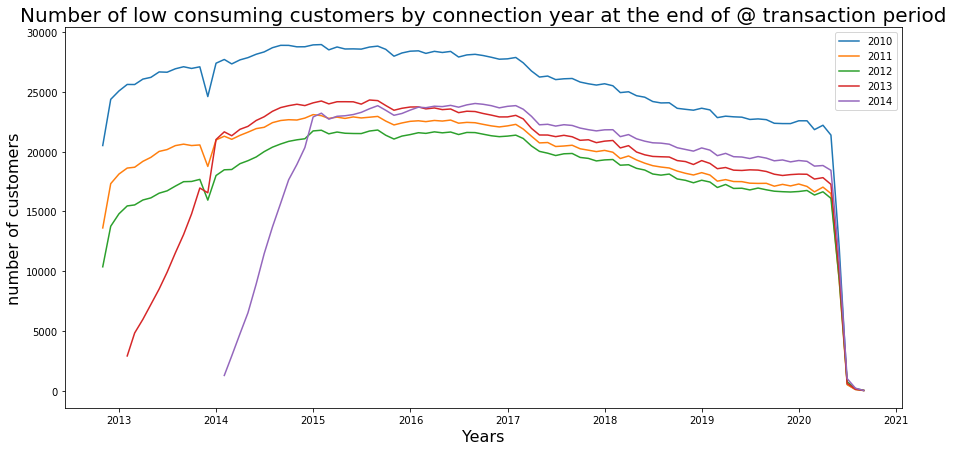

CPU times: user 311 ms, sys: 87.9 ms, total: 399 ms
Wall time: 461 ms


In [19]:
%%time
# lower consumer monthly count
fig, ax = plt.subplots(figsize=(15,7))
colors = ['cyan', 'green', 'brown', 'blue', 'black', 'gray','orange','olive','tab:purple','yellow']
for k, v in (customer_per_month_per_conn_year.items()):
    ax.plot(v,label=k, )
    ax.legend()
ax.set_xlabel('Years', fontsize=16)
ax.set_ylabel('number of customers', fontsize=16)
ax.set_title(f'Number of low consuming customers by connection year at the end of @ transaction period', fontsize=20)
plt.show()


### Upper quartile, median and lower quartile stats

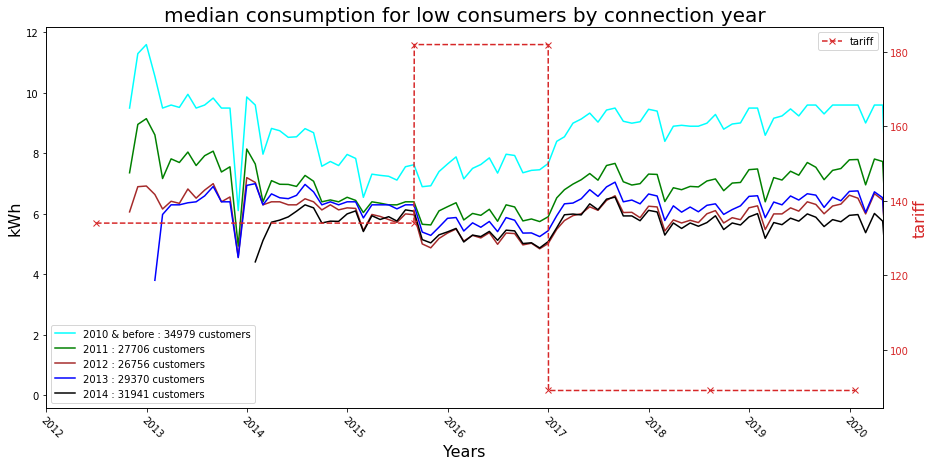

CPU times: user 348 ms, sys: 46.1 ms, total: 394 ms
Wall time: 411 ms


In [39]:
%%time
# quartiles stats low consumption
fig, ax1 = plt.subplots(figsize=(15,7))
colors = ['cyan', 'green', 'brown', 'blue', 'black', 'gray','orange','olive','tab:purple','yellow']

var_of_interest = 'kWh'
smoothed = False
key = 'median'

quart_stats = {
    'upper_quartile':upper_quat_list,
    'median':median_list,
    'lower_quartile':lower_quat_list
}


for n,i in enumerate(quart_stats[key]):
    if smoothed:
        if var_of_interest == 'kWh':
            ax1.plot(i.kWhs.rolling(3, min_periods=1).mean(),label=customers_per_conn_year[n], color=colors[n])
        elif var_of_interest == 'amounts':
            ax1.plot(i.amounts.rolling(3, min_periods=1).mean(),label=customers_per_conn_year[n], color=colors[n])
        elif var_of_interest == 'payment':
            ax1.plot(i.payment.rolling(3, min_periods=1).mean(),label=customers_per_conn_year[n], color=colors[n])
    else:
        if var_of_interest == 'kWh':
            ax1.plot(i.kWhs,label=customers_per_conn_year[n], color=colors[n])
        elif var_of_interest == 'amounts':
            ax1.plot(i.amounts,label=customers_per_conn_year[n], color=colors[n])
        elif var_of_interest == 'payment':
            ax1.plot(i.payment,label=customers_per_conn_year[n], color=colors[n])
    ax1.legend()
    
    
ax1.set_xlabel('Years', fontsize=16)
ax1.set_xlim([datetime.date(2012, 1, 1), datetime.date(2020, 5, 1)])
if var_of_interest == 'kWh':
    ax1.set_ylabel('kWh', fontsize=16)
    ax1.set_title(f'{key} consumption for low consumers by connection year', fontsize=20)
else:
    ax1.set_ylabel('rwf', fontsize=16)
    ax1.set_title(f'{key} payments for low consumers by connection year', fontsize=20)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('tariff', color=color, fontsize=16)  # we already handled the x-label with ax1
ax2.plot(low_tarrif_df,'x', color=color, ls='--', label='tariff')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend()

# rotates labels 
plt.setp( ax1.xaxis.get_majorticklabels(), rotation=-45 , ha="left" , rotation_mode="anchor") 
plt.show()

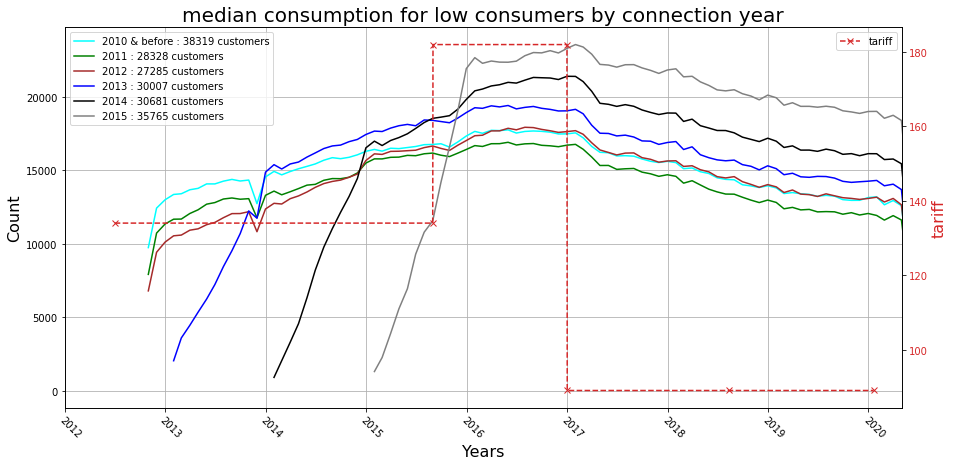

CPU times: user 896 ms, sys: 140 ms, total: 1.04 s
Wall time: 1.12 s


In [11]:
%%time
# quartiles stats low consumption
fig, ax1 = plt.subplots(figsize=(15,7))
colors = ['cyan', 'green', 'brown', 'blue', 'black', 'gray','orange','olive','tab:purple','yellow']

var_of_interest = 'count'
smoothed = False
key = 'median'

plt_years = combined_low_df.installation_year.unique().tolist()


for n,i in enumerate(plt_years):
    plt_low_df = combined_low_df[combined_low_df.installation_year==i]
    if smoothed:
        if var_of_interest == 'kWh':
            ax1.plot(i.kWhs.rolling(3, min_periods=1).mean(),label=customers_per_conn_year[n], color=colors[n])
        elif var_of_interest == 'amounts':
            ax1.plot(i.amounts.rolling(3, min_periods=1).mean(),label=customers_per_conn_year[n], color=colors[n])
        elif var_of_interest == 'payment':
            ax1.plot(i.payment.rolling(3, min_periods=1).mean(),label=customers_per_conn_year[n], color=colors[n])
    else:
        if var_of_interest == 'kWh':
            ax1.plot(plt_low_df.groupby(['trans_period'])['kWhs'].median(),label=customers_per_conn_year[n], color=colors[n])
        elif var_of_interest == 'count':
            ax1.plot(plt_low_df.groupby(['trans_period'])['kWhs'].count(),label=customers_per_conn_year[n], color=colors[n])
        elif var_of_interest == 'payment':
            ax1.plot(i.payment,label=customers_per_conn_year[n], color=colors[n])
    ax1.legend()
    
    
    
ax1.set_xlabel('Years', fontsize=16)
ax1.set_xlim([datetime.date(2012, 1, 1), datetime.date(2020, 5, 1)])
if var_of_interest == 'kWh':
    ax1.set_ylabel('kWh', fontsize=16)
    ax1.set_title(f'{key} consumption for low consumers by connection year', fontsize=20)
elif var_of_interest == 'count':
    ax1.set_ylabel('Count', fontsize=16)
    ax1.set_title(f'{key} consumption for low consumers by connection year', fontsize=20)
else:
    ax1.set_ylabel('rwf', fontsize=16)
    ax1.set_title(f'{key} payments for low consumers by connection year', fontsize=20)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('tariff', color=color, fontsize=16)  # we already handled the x-label with ax1
ax2.plot(low_tarrif_df,'x', color=color, ls='--', label='tariff')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend()
ax2.grid(False)
ax1.grid(True)

# rotates labels 
plt.setp( ax1.xaxis.get_majorticklabels(), rotation=-45 , ha="left" , rotation_mode="anchor") 
plt.show()

# Medium consumption

In [11]:
%%time

# quartiles for high consumption

# lists
quartiles = [0.25, 0.50, 0.75]          # inter-quartile range
lower_quat_list_medium=[]                 # lower quartile kWhs
median_list_medium=[]                     # median kWhs
upper_quat_list_medium=[]                 # upper quartile kWhs

customers_per_conn_year_medium =[]             # number of customers per installation year
customer_per_month_per_conn_year_medium = {}   # number of customers per installation year per transaction month

years_list = [2010, 2011, 2012,
              2013, 2014, 2015, 2016, 2017, 2018, 2019]  # installation years

combined_medium_df = pd.DataFrame()
year = 2010
while year < end_year:
    print(f'Year: {year}')
    if year == 2010:
        # filter installation years b4 and equal to 2010
        meta_year_filter = res_meta[res_meta.installation_year <= 2010]
    else:
        # filter based off installation year
        meta_year_filter = res_meta[res_meta.installation_year == year]

    df_by_year = df[df.meter_serial_number_consumer_id.isin(
        meta_year_filter.meter_serial_number_consumer_id)]  # create subset dataframe with single year of installation

    if year < 2012:
        # Select transactions couple of months prior to tariff change
        df_period_b4_tariff = df_by_year[(df_by_year.trans_period > before_tariff)
                  & (df_by_year.trans_period < tariff_date.strftime('%Y-%m-%d'))]
        # average consumption in period per customer
        y = df_period_b4_tariff.groupby(['meter_serial_number_consumer_id'])[
            'kWhs'].mean()
        y1 = y.reset_index()
        y1 = y1.rename(columns={'kWhs':'avg_kWh'})
        medium_consumers = y[(y >= 15) & (y <=50)].index.tolist()
    else:
        # Select transactions couple of months prior to tariff change
        df_period_b4_tariff = df_by_year[(df_by_year.trans_period > before_tariff)
                  & (df_by_year.trans_period < tariff_date.strftime('%Y-%m-%d'))]
        # average consumption in period per customer
        y = df_period_b4_tariff.groupby(['meter_serial_number_consumer_id'])[
            'kWhs'].mean()
        y1 = y.reset_index()
        y1 = y1.rename(columns={'kWhs':'avg_kWh'})
        medium_consumers = y[(y >= 15) & (y <=50)].index.tolist()

    # create subset of medium consumption customers
    medium_df_by_year = df[df.meter_serial_number_consumer_id.isin(medium_consumers)]

    # create subset with payments
    z = medium_df_by_year[['meter_serial_number_consumer_id',
                        'kWhs', 'trans_period']].copy()
    z.loc[:, 'installation_year'] = year
    z1 = pd.merge(z, y1, on=['meter_serial_number_consumer_id'], how='left')
    result = pd.merge(z1, payts_df[['meter_serial_number_consumer_id', 'amounts', 'trans_period']],
                      on=['meter_serial_number_consumer_id', 'trans_period'], how='inner')

    # store all medium customer transactions in single dataframe
    combined_medium_df = pd.concat([combined_medium_df, result])
    combined_medium_df['consumption_class'] = "MEDIUM"
  # count number of low consumers per transaction period(monthly)
    customer_per_month_per_conn_year_medium[year] = medium_df_by_year.groupby(
        ['trans_period'])['meter_serial_number_consumer_id'].count()
    
    medium_df_by_year = df_by_year[df_by_year.meter_serial_number_consumer_id.isin(medium_consumers)]
    quartile_cons = medium_df_by_year.groupby(['trans_period']).quantile([0.25,0.5,0.75])['kWhs']
    temp = quartile_cons.reset_index().rename(columns={'level_1':'quartiles'})
    temp.loc[ (temp.trans_period > '2012-07-01') & (temp.trans_period <= '2015-08-31'), 'tariff'] = 134
    temp.loc[ (temp.trans_period > '2015-08-31') & (temp.trans_period <= '2016-12-31'), 'tariff'] = 182
    temp.loc[ (temp.trans_period > '2016-12-31')& (temp.trans_period <= '2018-07-30'), 'tariff'] = 189
    temp.loc[ (temp.trans_period > '2018-07-30'), 'tariff'] = 210
    temp['payment'] = temp['kWhs'] * temp['tariff']
    
    # compute quartile stats for consumption    
    for quart in quartiles:
        tmp = temp[temp.quartiles==quart]
        tmp = tmp.set_index(['trans_period'])
        tmp = tmp.drop(['quartiles'],axis=1)
 
        
        if quart==0.25:
            lower_quat_list_medium.append(tmp)

        elif quart==0.50:
            median_list_medium.append(tmp)

        elif quart==0.75:
            upper_quat_list_medium.append(tmp)

    
    cust_count = medium_df_by_year.meter_serial_number_consumer_id.nunique()
    if year==2010:
        customers_per_conn_year_medium.append(f"{year} & before : {cust_count} customers")
    else:
        customers_per_conn_year_medium.append(f"{year} : {cust_count} customers")    
    year += 1
os.system('say "Your program has now finished"')

Year: 2010
Year: 2011
Year: 2012
Year: 2013
Year: 2014
CPU times: user 1min 54s, sys: 23.6 s, total: 2min 18s
Wall time: 2min 18s


32512

In [12]:
%%time
## percentage of medium customer monthly transactions that are actually bemedium 15 kWh
original_medium = combined_medium_df.groupby(['meter_serial_number_consumer_id']
                                      )['kWhs'].count().reset_index(
).rename(columns={"kWhs": "all_kWhs"})
check_combined_medium_df = combined_medium_df[(combined_medium_df.kWhs >= 15) & (combined_medium_df.kWhs <= 50)]
check_medium = check_combined_medium_df.groupby(['meter_serial_number_consumer_id']
                                         )['kWhs'].count().reset_index(
).rename(columns={"kWhs": "medium_kWhs"})
all_medium = pd.merge(original_medium,check_medium, how='inner')
all_medium['percent_kwhs_medium'] = round(all_medium['medium_kWhs']/all_medium['all_kWhs']*100,0)
perc_val = len(all_medium[all_medium.percent_kwhs_medium>80])/len(all_medium)
print(f'{round(perc_val*100,0)}% of customers have 80% of transactions between 15 and 50 kWh')

26.0% of customers have 80% of transactions between 15 and 50 kWh
CPU times: user 2.29 s, sys: 674 ms, total: 2.96 s
Wall time: 2.96 s


In [13]:
medium_high_conf_count = combined_medium_df.meter_serial_number_consumer_id.nunique()
medium_high_conf_count

32569

In [11]:
medium_customer_true_list = all_medium[all_medium['percent_kwhs_medium'
                                        ]>=80].meter_serial_number_consumer_id.unique(
).tolist()
combined_medium_df= combined_medium_df[combined_medium_df.meter_serial_number_consumer_id.isin(medium_customer_true_list)]
medium_count = combined_medium_df.meter_serial_number_consumer_id.nunique()
print(medium_count)
print(f'{round(((medium_high_conf_count-medium_count)/medium_high_conf_count)*100,0)}% drop in customers')

32569
72.0% drop in customers


### Monthly count for medium consumers

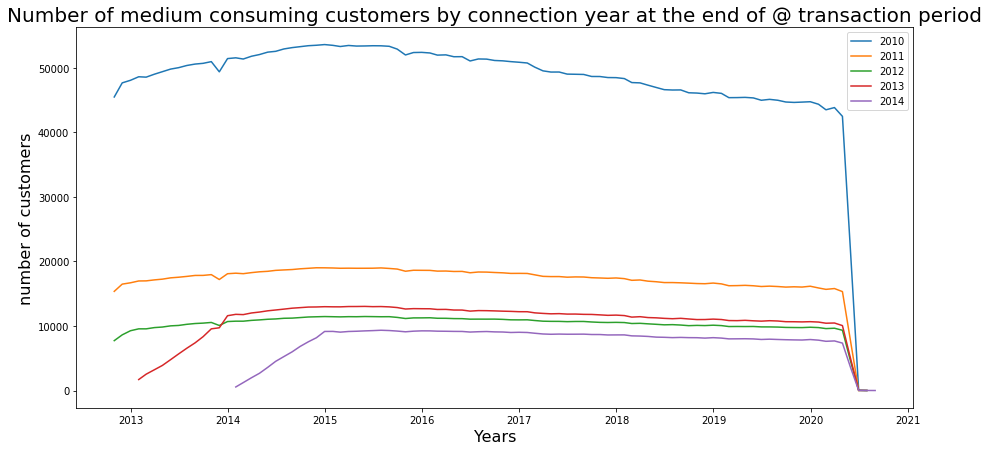

CPU times: user 259 ms, sys: 47.2 ms, total: 306 ms
Wall time: 317 ms


In [26]:
%%time
# lower consumer monthly count
fig, ax = plt.subplots(figsize=(15,7))
colors = ['cyan', 'green', 'brown', 'blue', 'black', 'gray','orange','olive','tab:purple','yellow']
for k, v in (customer_per_month_per_conn_year_medium.items()):
    ax.plot(v,label=k, )
    ax.legend()
ax.set_xlabel('Years', fontsize=16)
ax.set_ylabel('number of customers', fontsize=16)
ax.set_title(f'Number of medium consuming customers by connection year at the end of @ transaction period', fontsize=20)
plt.show()

### Upper quartile, median and lower quartile stats

NameError: name 'upper_quat_list_medium' is not defined

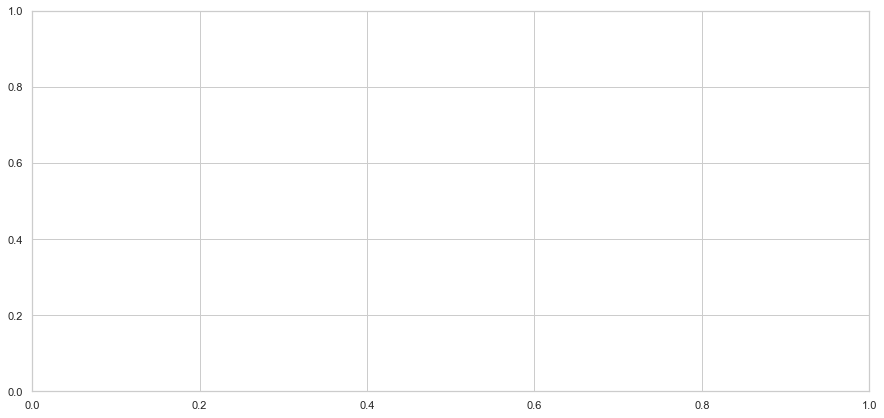

In [35]:
%%time
# quartiles stats low consumption
fig, ax1 = plt.subplots(figsize=(15,7))
colors = ['cyan', 'green', 'brown', 'blue', 'black', 'gray','orange','olive','tab:purple','yellow']

var_of_interest = 'kWh'
smoothed = False
key = 'median'

quart_stats = {
    'upper_quartile':upper_quat_list_medium,
    'median':median_list_medium,
    'lower_quartile':lower_quat_list_medium
}


for n,i in enumerate(quart_stats[key]):
    if smoothed:
        if var_of_interest == 'kWh':
            ax1.plot(i.kWhs.rolling(3, min_periods=1).mean(),label=customers_per_conn_year_medium[n], color=colors[n])
        elif var_of_interest == 'amounts':
            ax1.plot(i.amounts.rolling(3, min_periods=1).mean(),label=customers_per_conn_year_medium[n], color=colors[n])
        elif var_of_interest == 'payment':
            ax1.plot(i.payment.rolling(3, min_periods=1).mean(),label=customers_per_conn_year_medium[n], color=colors[n])
    else:
        if var_of_interest == 'kWh':
            ax1.plot(i.kWhs,label=customers_per_conn_year_medium[n], color=colors[n])
        elif var_of_interest == 'amounts':
            ax1.plot(i.amounts,label=customers_per_conn_year_medium[n], color=colors[n])
        elif var_of_interest == 'payment':
            ax1.plot(i.payment,label=customers_per_conn_year_medium[n], color=colors[n])
    ax1.legend()
    
    
ax1.set_xlabel('Years', fontsize=16)
ax1.set_xlim([datetime.date(2012, 1, 1), datetime.date(2020, 5, 1)])
if var_of_interest == 'kWh':
    ax1.set_ylabel('kWh', fontsize=16)
    ax1.set_title(f'{key} consumption for medium consumers by connection year', fontsize=20)
else:
    ax1.set_ylabel('rwf', fontsize=16)
    ax1.set_title(f'{key} payments for medium consumers by connection year', fontsize=20)

ax1.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('tariff', color=color, fontsize=16)  # we already handled the x-label with ax1
ax2.plot(medium_tarrif_df,'x', color=color, ls='--', label='tariff')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend()

# rotates labels 
plt.setp( ax1.xaxis.get_majorticklabels(), rotation=-45 , ha="left" , rotation_mode="anchor") 
plt.show()

# High consumption

In [13]:
%%time
# quartiles for high consumption

# lists
quartiles = [0.25, 0.50, 0.75]          # inter-quartile range
lower_quat_list_high=[]                 # lower quartile kWhs
median_list_high=[]                     # median kWhs
upper_quat_list_high=[]                 # upper quartile kWhs

customers_per_conn_year_high =[]             # number of customers per installation year
customer_per_month_per_conn_year_high = {}   # number of customers per installation year per transaction month
years_list = [2010,2011,2012,
              2013,2014,2015,2016,2017,2018,2019] # installation years

combined_high_df = pd.DataFrame()


year = 2010
while year < end_year:
    print(f'Year: {year}')
    if year==2010:
        meta_year_filter = res_meta[res_meta.installation_year <= 2010]
    else:
        meta_year_filter = res_meta[res_meta.installation_year == year]
    df_by_year = df[df.meter_serial_number_consumer_id.isin(meta_year_filter.meter_serial_number_consumer_id)]

    if year < 2012:
        # Select transactions couple of months prior to tariff change
        df_period_b4_tariff = df_by_year[(df_by_year.trans_period > before_tariff)
                  & (df_by_year.trans_period < tariff_date.strftime('%Y-%m-%d'))]
        # average consumption in period per customer
        y = df_period_b4_tariff.groupby(['meter_serial_number_consumer_id'])[
            'kWhs'].mean()
        y1 = y.reset_index()
        y1 = y1.rename(columns={'kWhs':'avg_kWh'})
        high_consumers = y[y>50].index.tolist()
    else:  
        # Select transactions couple of months prior to tariff change
        df_period_b4_tariff = df_by_year[(df_by_year.trans_period > before_tariff)
                  & (df_by_year.trans_period < tariff_date.strftime('%Y-%m-%d'))]
        # average consumption in period per customer
        y = df_period_b4_tariff.groupby(['meter_serial_number_consumer_id'])[
            'kWhs'].mean()
        y1 = y.reset_index()
        y1 = y1.rename(columns={'kWhs':'avg_kWh'})
        high_consumers = y[y>50].index.tolist()
        
    # create subset of low consumption customers
    high_df_by_year = df[df.meter_serial_number_consumer_id.isin(high_consumers)]
    
    # create subset with payments   
    z = high_df_by_year[['meter_serial_number_consumer_id','kWhs','trans_period']].copy()
    z.loc[:,'installation_year'] = year
    z1 = pd.merge(z, y1, on=['meter_serial_number_consumer_id'], how='left')
    result = pd.merge(z1, payts_df[['meter_serial_number_consumer_id','amounts','trans_period']], 
                  on=['meter_serial_number_consumer_id','trans_period'],how='inner')
    
    # store all low customer transactions in single dataframe    
    combined_high_df = pd.concat([combined_high_df, result])
    combined_high_df['consumption_class'] = "HIGH"
        
    # count number of low consumers per transaction period(monthly)
    customer_per_month_per_conn_year_high[year] = high_df_by_year.groupby(
        ['trans_period'])['meter_serial_number_consumer_id'].count()
    
    high_df_by_year = df_by_year[df_by_year.meter_serial_number_consumer_id.isin(high_consumers)]
    quartile_cons = high_df_by_year.groupby(['trans_period']).quantile([0.25,0.5,0.75])['kWhs']
    temp = quartile_cons.reset_index().rename(columns={'level_1':'quartiles'})
    temp.loc[ (temp.trans_period > '2012-07-01') & (temp.trans_period <= '2015-08-31'), 'tariff'] = 134
    temp.loc[ (temp.trans_period > '2015-08-31') & (temp.trans_period <= '2016-12-31'), 'tariff'] = 182
    temp.loc[ (temp.trans_period > '2016-12-31')& (temp.trans_period <= '2018-07-30'), 'tariff'] = 189
    temp.loc[ (temp.trans_period > '2018-07-30'), 'tariff'] = 210
    temp['payment'] = temp['kWhs'] * temp['tariff']
    
    # compute quartile stats for consumption    
    for quart in quartiles:
        tmp = temp[temp.quartiles==quart]
        tmp = tmp.set_index(['trans_period'])
        tmp = tmp.drop(['quartiles'],axis=1)
 
        
        if quart==0.25:
            lower_quat_list_high.append(tmp)

        elif quart==0.50:
            median_list_high.append(tmp)

        elif quart==0.75:
            upper_quat_list_high.append(tmp)

    
    cust_count = high_df_by_year.meter_serial_number_consumer_id.nunique()
    if year==2010:
        customers_per_conn_year_high.append(f"{year} & before : {cust_count} customers")
    else:
        customers_per_conn_year_high.append(f"{year} : {cust_count} customers")
    year += 1
#     break
os.system('say "Your program has now finished"')

Year: 2010
Year: 2011
Year: 2012
Year: 2013
Year: 2014
CPU times: user 1min 33s, sys: 20.6 s, total: 1min 53s
Wall time: 1min 54s


32512

In [14]:
## percentage of high customer monthly transactions that are actually above 50 kWh
original_high = combined_high_df.groupby(['meter_serial_number_consumer_id']
                                      )['kWhs'].count().reset_index(
).rename(columns={"kWhs": "all_kWhs"})
check_combined_high_df = combined_high_df[combined_high_df.kWhs > 50]
check_high = check_combined_high_df.groupby(['meter_serial_number_consumer_id']
                                         )['kWhs'].count().reset_index(
).rename(columns={"kWhs": "high_kWhs"})
all_high = pd.merge(original_high,check_high, how='inner')
all_high['percent_kwhs_above_50'] = round(all_high['high_kWhs']/all_high['all_kWhs']*100,0)
perc_val = len(all_high[all_high.percent_kwhs_above_50>80])/len(all_high)
print(f'{round(perc_val*100,0)}% of customers have 80% of transactions above 50 kWh')

47.0% of customers have 80% of transactions above 50 kWh


In [16]:
high_high_conf_count = combined_high_df.meter_serial_number_consumer_id.nunique()
high_high_conf_count

60492

In [17]:
high_customer_true_list = all_high[all_high['percent_kwhs_above_50'
                                        ]>=80].meter_serial_number_consumer_id.unique(
).tolist()
combined_high_df= combined_high_df[combined_high_df.meter_serial_number_consumer_id.isin(high_customer_true_list)]
high_count = combined_high_df.meter_serial_number_consumer_id.nunique()
print(high_count)
print(f'{round(((high_high_conf_count-high_count)/high_high_conf_count)*100,0)}% drop in customers')

29447
51.0% drop in customers


### Monthly count for high consumers

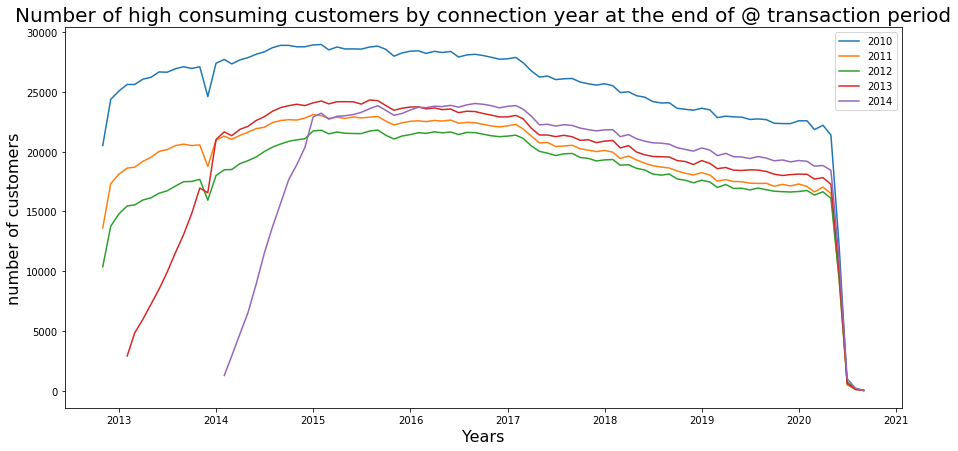

CPU times: user 267 ms, sys: 37.8 ms, total: 305 ms
Wall time: 320 ms


In [37]:
%%time
# Upper consumer monthly count
fig, ax = plt.subplots(figsize=(15,7))
colors = ['cyan', 'green', 'brown', 'blue', 'black', 'gray','orange','olive','tab:purple','yellow']
for k, v in (customer_per_month_per_conn_year.items()):
    ax.plot(v,label=k, )
    ax.legend()
ax.set_xlabel('Years', fontsize=16)
ax.set_ylabel('number of customers', fontsize=16)
ax.set_title(f'Number of high consuming customers by connection year at the end of @ transaction period', fontsize=20)
plt.show()

### Upper quartile, median and lower quartile stats

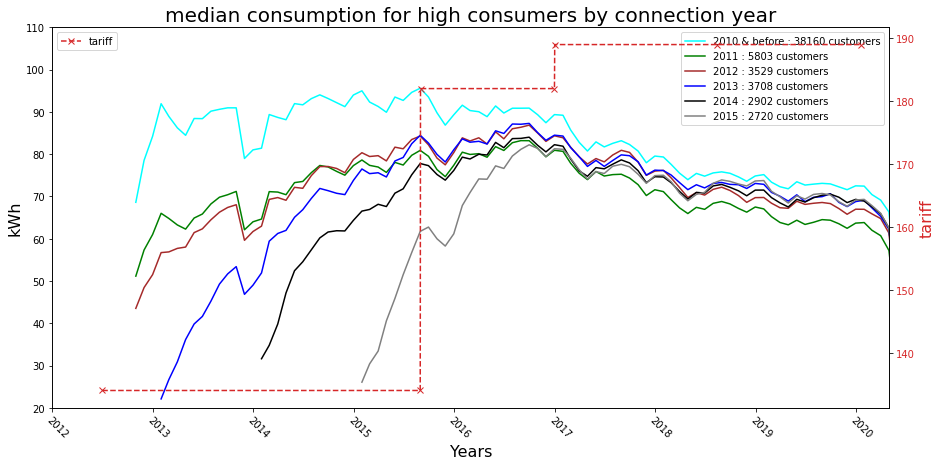

CPU times: user 400 ms, sys: 86.5 ms, total: 487 ms
Wall time: 539 ms


In [17]:
%%time
# quartiles stats high consumption
fig, ax1 = plt.subplots(figsize=(15,7))
colors = ['cyan', 'green', 'brown', 'blue', 'black', 'gray','orange','olive','tab:purple','yellow']

var_of_interest = 'kWh'
smoothed = True
key = 'median'

quart_stats = {
    'upper_quartile':upper_quat_list_high,
    'median':median_list_high,
    'lower_quartile':lower_quat_list_high
}


for n,i in enumerate(quart_stats[key]):
    if smoothed:
        if var_of_interest == 'kWh':
            ax1.plot(i.kWhs.rolling(3, min_periods=1).mean(),label=customers_per_conn_year_high[n], color=colors[n])
        elif var_of_interest == 'amounts':
            ax1.plot(i.amounts.rolling(3, min_periods=1).mean(),label=customers_per_conn_year_high[n], color=colors[n])
        elif var_of_interest == 'payment':
            ax1.plot(i.payment.rolling(3, min_periods=1).mean(),label=customers_per_conn_year_high[n], color=colors[n])
    else:
        if var_of_interest == 'kWh':
            ax1.plot(i.kWhs,label=customers_per_conn_year_high[n], color=colors[n])
        elif var_of_interest == 'amounts':
            ax1.plot(i.amounts,label=customers_per_conn_year_high[n], color=colors[n])
        elif var_of_interest == 'payment':
            ax1.plot(i.payment,label=customers_per_conn_year_high[n], color=colors[n])
    ax1.legend()
    
    
ax1.set_xlabel('Years', fontsize=16)
ax1.set_xlim([datetime.date(2012, 1, 1), datetime.date(2020, 5, 1)])
if var_of_interest == 'kWh':
    ax1.set_ylabel('kWh', fontsize=16)
    ax1.set_title(f'{key} consumption for high consumers by connection year', fontsize=20)
    if key == 'lower_quartile':
        ax1.set_ylim([20,110])
    elif key == 'median':
        ax1.set_ylim([20,110])
    elif key == 'upper_quartile':
        ax1.set_ylim([70,200])
else:
    ax1.set_ylabel('rwf', fontsize=16)
    ax1.set_title(f'{key} payments for high consumers by connection year', fontsize=20)
    if key == 'lower_quartile':
        ax1.set_ylim([4000,13000])
    elif key == 'median':
        ax1.set_ylim([6000,20000])
    elif key == 'upper_quartile':
        ax1.set_ylim([10000,33000])
    

ax1.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('tariff', color=color, fontsize=16)  # we already handled the x-label with ax1
ax2.plot(high_tarrif_df,'x', color=color, ls='--', label='tariff')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend()

# rotates labels 
plt.setp( ax1.xaxis.get_majorticklabels(), rotation=-45 , ha="left" , rotation_mode="anchor") 
plt.show()

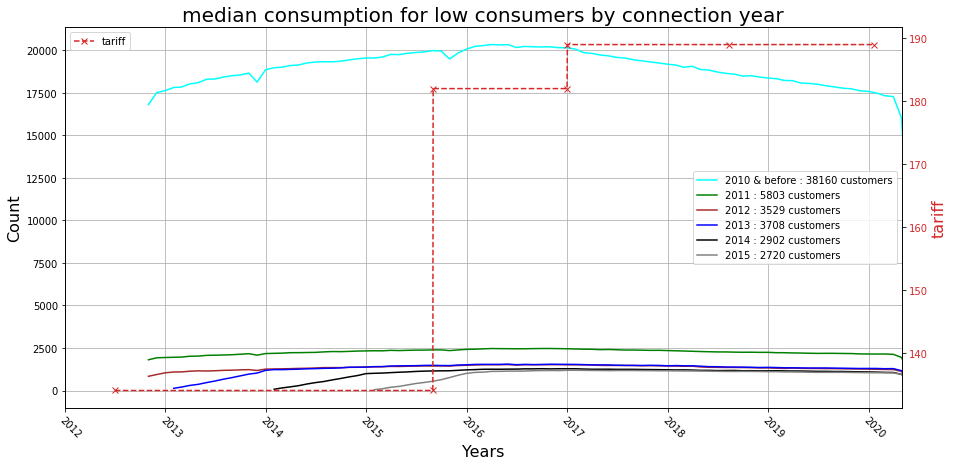

CPU times: user 564 ms, sys: 121 ms, total: 685 ms
Wall time: 732 ms


In [20]:
%%time
# quartiles stats high consumption
fig, ax1 = plt.subplots(figsize=(15,7))
colors = ['cyan', 'green', 'brown', 'blue', 'black', 'gray','orange','olive','tab:purple','yellow']

var_of_interest = 'count'
smoothed = False
key = 'median'

plt_years = combined_high_df.installation_year.unique().tolist()

for n,i in enumerate(plt_years):
    plt_high_df = combined_high_df[combined_high_df.installation_year==i]
    if smoothed:
        if var_of_interest == 'kWh':
            ax1.plot(i.kWhs.rolling(3, min_periods=1).mean(),label=customers_per_conn_year_high[n], color=colors[n])
        elif var_of_interest == 'amounts':
            ax1.plot(i.amounts.rolling(3, min_periods=1).mean(),label=customers_per_conn_year_high[n], color=colors[n])
        elif var_of_interest == 'payment':
            ax1.plot(i.payment.rolling(3, min_periods=1).mean(),label=customers_per_conn_year_high[n], color=colors[n])
    else:
        if var_of_interest == 'kWh':
            ax1.plot(plt_high_df.groupby(['trans_period'])['kWhs'].median(),label=customers_per_conn_year_high[n], color=colors[n])
        elif var_of_interest == 'count':
            ax1.plot(plt_high_df.groupby(['trans_period'])['kWhs'].count(),label=customers_per_conn_year_high[n], color=colors[n])
        elif var_of_interest == 'payment':
            ax1.plot(i.payment,label=customers_per_conn_year_high[n], color=colors[n])
    ax1.legend()
    
    
ax1.set_xlabel('Years', fontsize=16)
ax1.set_xlim([datetime.date(2012, 1, 1), datetime.date(2020, 5, 1)])
if var_of_interest == 'kWh':
    ax1.set_ylabel('kWh', fontsize=16)
    ax1.set_title(f'{key} consumption for high consumers by connection year', fontsize=20)
    if key == 'lower_quartile':
        ax1.set_ylim([20,110])
    elif key == 'median':
        ax1.set_ylim([50,150])
    elif key == 'upper_quartile':
        ax1.set_ylim([70,200])
elif var_of_interest == 'count':
    ax1.set_ylabel('Count', fontsize=16)
    ax1.set_title(f'{key} consumption for low consumers by connection year', fontsize=20)
else:
    ax1.set_ylabel('rwf', fontsize=16)
    ax1.set_title(f'{key} payments for high consumers by connection year', fontsize=20)
    if key == 'lower_quartile':
        ax1.set_ylim([4000,13000])
    elif key == 'median':
        ax1.set_ylim([6000,20000])
    elif key == 'upper_quartile':
        ax1.set_ylim([10000,33000])
    

ax1.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('tariff', color=color, fontsize=16)  # we already handled the x-label with ax1
ax2.plot(high_tarrif_df,'x', color=color, ls='--', label='tariff')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend()
ax1.grid(True)

# rotates labels 
plt.setp( ax1.xaxis.get_majorticklabels(), rotation=-45 , ha="left" , rotation_mode="anchor") 
plt.show()

# Revenue per cohort

## Low consumers

In [5]:
# total revenue
total_rev_per_year_low = combined_low_df.groupby(['installation_year','trans_period'])['amounts'].sum().unstack().T

# groupby by monthly payments then compute the total payments each month
low_monthly_customer_count = combined_low_df.groupby(['installation_year','trans_period']
                                                    )['meter_serial_number_consumer_id'
                                                     ].count().unstack().T

# revenue per low residential customer
rev_per_customer_per_year_low = total_rev_per_year_low.divide(low_monthly_customer_count)

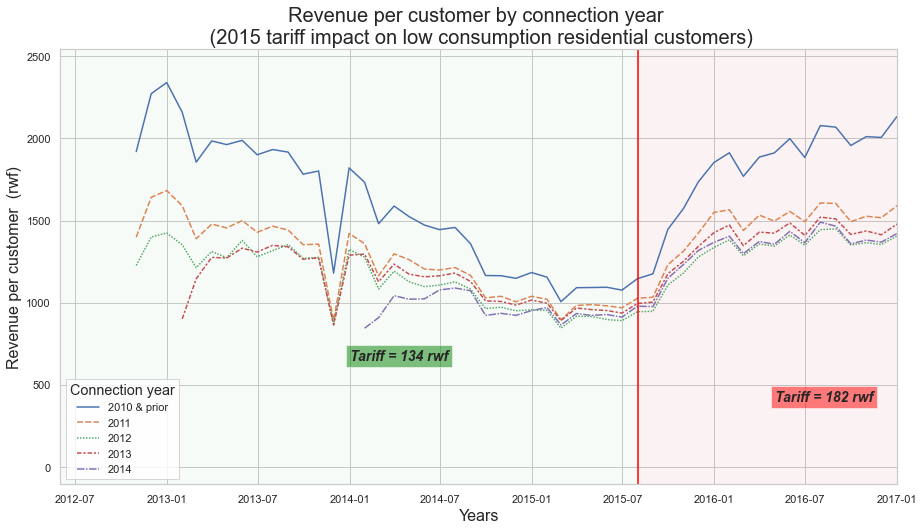

In [6]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)


formatter = FuncFormatter(millions)

data_list = ['total_revenue','revenue_per_customer']
data = data_list[1]
city = None
xlim = [datetime.date(2012, 6, 1),datetime.date(2016, 1, 1),datetime.date(2017, 1, 1), datetime.date(2020, 4, 1)]

if tariff_date == tariff_date_1:
    end_year1 = end_year
elif tariff_date == tariff_date_2:
    end_year1 = end_year+1


sns.set(style = 'whitegrid',rc={'figure.figsize':(15,8)})
if data == 'total_revenue':
    ax = sns.lineplot(data=total_rev_per_year_low)
    ax.yaxis.set_major_formatter(formatter)
    text_yposition = 12000000
    ax.set_ylabel('monthly revenues  (rwf)', fontsize=16)
    ax.set_title(f'Total monthly revenues by connection year (low consumption residential customers) {city}', fontsize=20)

elif data == 'revenue_per_customer':
    ax = sns.lineplot(data=rev_per_customer_per_year_low)
    text_yposition = 1000
    ax.set_ylabel('Revenue per customer  (rwf)', fontsize=16)
    ax.set_title(f'Revenue per customer by connection year \n ({end_year1} tariff impact on low consumption residential customers)', fontsize=20)
    
ax.set_xlabel('Years', fontsize=16)

plt.legend(rev_legend, # ,'2015','2016','2017','2018','2019'
          title="Connection year",fancybox=False, title_fontsize='large')

if tariff_date == tariff_date_1:
    ax.set_xlim([xlim[0], xlim[2]])
    plt.axvline(x = datetime.date(2015, 8, 1),
        color ='red')
    plt.text(datetime.date(2014, 1, 1),650 ,'Tariff = 134 rwf', fontsize = 14, style='italic',
            bbox = dict(facecolor = 'green', alpha = 0.5), fontweight='bold')
elif tariff_date == tariff_date_2:
    ax.set_xlim([xlim[1], xlim[3]])
    plt.axvline(x = datetime.date(2017, 1, 1),
                color ='red')
    plt.text(datetime.date(2018, 1, 1), 400,'Tariff = 89 rwf', fontsize = 14, style='italic',
            bbox = dict(facecolor = 'gray', alpha = 0.5), fontweight='bold')



plt.text(datetime.date(2016, 5, 1), 400,'Tariff = 182 rwf', fontsize = 14, style='italic',
        bbox = dict(facecolor = 'red', alpha = 0.5), fontweight='bold')




plt.axvspan(datetime.date(2015, 8, 1), datetime.date(2017, 1, 1), alpha=0.03, color='red')
plt.axvspan(datetime.date(2012, 1, 1),datetime.date(2015, 8, 1), alpha=0.03, color='green')
plt.axvspan(datetime.date(2015, 8, 1),datetime.date(2020, 4, 1), alpha=0.03, color='gray');

## High consumers

In [12]:
# total revenue
total_rev_per_year_high = combined_high_df.groupby(['installation_year','trans_period'])['amounts'].sum().unstack().T

# groupby by monthly payments then compute the total payments each month
high_monthly_customer_count = combined_high_df.groupby(['installation_year','trans_period']
                                                    )['meter_serial_number_consumer_id'
                                                     ].count().unstack().T

# # total revenue
# total_rev_per_year_high = combined_high_df.groupby(['trans_period'])['amounts'].sum()

# # groupby by monthly payments then compute the total payments each month
# high_monthly_customer_count = combined_high_df.groupby(['trans_period']
#                                                     )['meter_serial_number_consumer_id'
#                                                      ].count()

# revenue per low residential customer
rev_per_customer_per_year_high = total_rev_per_year_high.divide(high_monthly_customer_count)

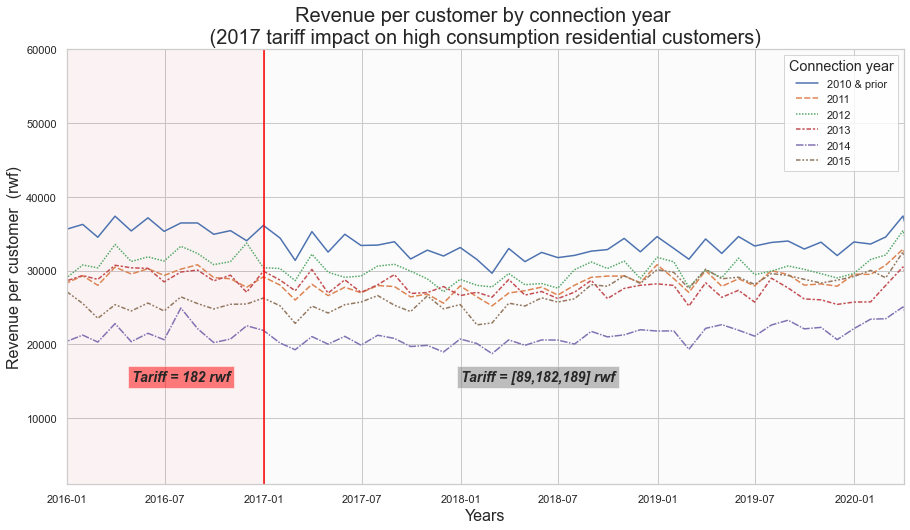

In [13]:
from matplotlib.ticker import FuncFormatter
def billions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fB' % (x * 1e-9)


formatter = FuncFormatter(billions)
city = 'NON KIGALI'

data_list = ['total_revenue','revenue_per_customer']
data = data_list[1]
xlim = [datetime.date(2012, 6, 1),datetime.date(2016, 1, 1),datetime.date(2017, 1, 1), datetime.date(2020, 4, 1)]
if tariff_date == tariff_date_1:
    end_year1 = end_year
elif tariff_date == tariff_date_2:
    end_year1 = end_year+1

sns.set(style = 'whitegrid',rc={'figure.figsize':(15,8)})
if data == 'total_revenue':
    ax = sns.lineplot(data=total_rev_per_year_high)
    ax.yaxis.set_major_formatter(formatter)
    text_yposition = 200000000#600000000
    ax.set_ylabel('monthly revenues  (rwf)', fontsize=16)
    ax.set_title(f'Total monthly revenues by connection year (high consumption residential) {city}', fontsize=20)
    # ax.set_ylim([10000000,200000000])
    
elif data == 'revenue_per_customer':
    ax = sns.lineplot(data=rev_per_customer_per_year_high)
    text_yposition = 15000
    ax.set_ylabel('Revenue per customer  (rwf)', fontsize=16)
    ax.set_title(f'Revenue per customer by connection year \n ({end_year1} tariff impact on high consumption residential customers) ', fontsize=20)
    ax.set_ylim([1000,60000])
    
ax.set_xlabel('Years', fontsize=16)
plt.legend(rev_legend, # ,'2015','2016','2017','2018','2019'
          title="Connection year",fancybox=False, title_fontsize='large')

if tariff_date == tariff_date_1:
    ax.set_xlim([xlim[0], xlim[2]])
    plt.axvline(x = datetime.date(2015, 8, 1),
        color ='red')
    plt.text(datetime.date(2014, 1, 1),text_yposition ,'Tariff = 134 rwf', fontsize = 14, style='italic',
            bbox = dict(facecolor = 'green', alpha = 0.5), fontweight='bold')
elif tariff_date == tariff_date_2:
    ax.set_xlim([xlim[1], xlim[3]])
    plt.axvline(x = datetime.date(2017, 1, 1),
                color ='red')
    plt.text(datetime.date(2018, 1, 1), text_yposition,'Tariff = [89,182,189] rwf', fontsize = 14, style='italic',
            bbox = dict(facecolor = 'gray', alpha = 0.5), fontweight='bold')

plt.text(datetime.date(2016, 5, 1), text_yposition,'Tariff = 182 rwf', fontsize = 14, style='italic',
        bbox = dict(facecolor = 'red', alpha = 0.5), fontweight='bold')

plt.axvspan(datetime.date(2015, 8, 1), datetime.date(2017, 1, 1), alpha=0.03, color='red')
plt.axvspan(datetime.date(2012, 1, 1),datetime.date(2015, 8, 1), alpha=0.03, color='green')
plt.axvspan(datetime.date(2015, 8, 1),datetime.date(2020, 4, 1), alpha=0.03, color='gray');

## Medium consumers

In [9]:
# total revenue
total_rev_per_year_medium = combined_medium_df.groupby(['installation_year','trans_period'])['amounts'].sum().unstack().T

# groupby by monthly payments then compute the total payments each month
medium_monthly_customer_count = combined_medium_df.groupby(['installation_year','trans_period']
                                                    )['meter_serial_number_consumer_id'
                                                     ].count().unstack().T

# revenue per medium residential customer
rev_per_customer_per_year_medium = total_rev_per_year_medium.divide(medium_monthly_customer_count)

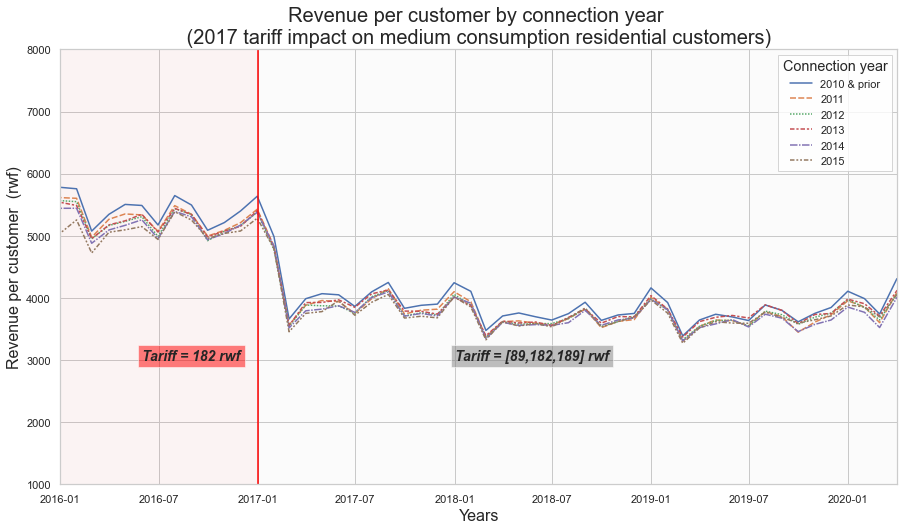

In [16]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)


formatter = FuncFormatter(millions)

data_list = ['total_revenue','revenue_per_customer']
data = data_list[1]
city = None

xlim = [datetime.date(2012, 6, 1),datetime.date(2016, 1, 1),datetime.date(2017, 1, 1), datetime.date(2020, 4, 1)]
if tariff_date == tariff_date_1:
    end_year1 = end_year
elif tariff_date == tariff_date_2:
    end_year1 = end_year+1
    
sns.set(style = 'whitegrid',rc={'figure.figsize':(15,8)})
if data == 'total_revenue':
    ax = sns.lineplot(data=total_rev_per_year_medium)
    ax.yaxis.set_major_formatter(formatter)
    text_yposition = 12000000
    ax.set_ylabel('monthly revenues  (rwf)', fontsize=16)
    ax.set_title(f'Total monthly revenues by connection year (medium consumption residential customers) {city}', fontsize=20)
    
elif data == 'revenue_per_customer':
    ax = sns.lineplot(data=rev_per_customer_per_year_medium)
    text_yposition = 3000
    ax.set_ylabel('Revenue per customer  (rwf)', fontsize=16)
    ax.set_title(f'Revenue per customer by connection year \n ({end_year1} tariff impact on medium consumption residential customers) ', fontsize=20)
    ax.set_ylim([1000,8000])
ax.set_xlabel('Years', fontsize=16)
plt.legend(rev_legend, # ,'2015','2016','2017','2018','2019'
          title="Connection year",fancybox=False, title_fontsize='large')

if tariff_date == tariff_date_1:
    ax.set_xlim([xlim[0], xlim[2]])
    plt.axvline(x = datetime.date(2015, 8, 1),
        color ='red')
    plt.text(datetime.date(2014, 1, 1),text_yposition ,'Tariff = 134 rwf', fontsize = 14, style='italic',
            bbox = dict(facecolor = 'green', alpha = 0.5), fontweight='bold')
elif tariff_date == tariff_date_2:
    ax.set_xlim([xlim[1], xlim[3]])
    plt.axvline(x = datetime.date(2017, 1, 1),
                color ='red')
    plt.text(datetime.date(2018, 1, 1), text_yposition,'Tariff = [89,182,189] rwf', fontsize = 14, style='italic',
            bbox = dict(facecolor = 'gray', alpha = 0.5), fontweight='bold')
    
plt.text(datetime.date(2016, 6, 1), text_yposition,'Tariff = 182 rwf', fontsize = 14, style='italic',
        bbox = dict(facecolor = 'red', alpha = 0.5), fontweight='bold')

plt.axvspan(datetime.date(2015, 8, 1), datetime.date(2017, 1, 1), alpha=0.03, color='red')
plt.axvspan(datetime.date(2012, 1, 1),datetime.date(2015, 8, 1), alpha=0.03, color='green')
plt.axvspan(datetime.date(2015, 8, 1),datetime.date(2020, 4, 1), alpha=0.03, color='gray');

#  Elasticity 

In [15]:
combined_low_df

,meter_serial_number_consumer_id,kWhs,trans_period,installation_year,avg_kWh,amounts,consumption_class
0,4226691659_157450,2.036364,2013-01-31,2010,9.725000,269.818182,LOW
1,4226691659_157450,7.163636,2014-01-31,2010,9.725000,962.545455,LOW
2,4226691659_157450,9.763636,2015-01-31,2010,9.725000,1309.272727,LOW
3,4226691659_157450,4.563636,2016-01-31,2010,9.725000,829.909091,LOW
4,4226691659_157450,13.454545,2018-01-31,2010,9.725000,1200.181818,LOW
...,...,...,...,...,...,...,...
1549831,7067098728_20140319 092011.463 0002038 5949,12.958333,2017-11-30,2014,11.018182,1162.916667,LOW
1549832,7067098728_20140319 092011.463 0002038 5949,1.633333,2014-12-31,2014,11.018182,222.250000,LOW
1549833,7067098728_20140319 092011.463 0002038 5949,13.172727,2015-12-31,2014,11.018182,2419.772727,LOW
1549834,7067098728_20140319 092011.463 0002038 5949,4.600000,2016-12-31,2014,11.018182,845.000000,LOW


In [19]:
%%time
tariff_1 = 182
tariff_2 = 89
tariff_date_1 = datetime.date(2015, 9, 1) # 1st tariff change
tariff_date_2 = datetime.date(2017, 1, 1) # 2nd tariff change

 
tariff_date = tariff_date_2
period = 1
time_period = datetime.timedelta(days=(period*365))
combined_df = combined_medium_df

before_tariff = (tariff_date - time_period).strftime('%Y-%m-%d')
after_tariff  = (tariff_date + time_period).strftime('%Y-%m-%d')
# tariff_year = '2015'
tariff_date = tariff_date.strftime('%Y-%m-%d')

before_tariff_df = combined_df[(combined_df.trans_period>before_tariff)
                                       &(combined_df.trans_period<tariff_date)]
before_tariff_df = before_tariff_df.groupby(['meter_serial_number_consumer_id','installation_year'])[['kWhs','amounts']
                                                                 ].mean().reset_index().rename(columns=
                                                                    {'kWhs':'avg_kWhs_before',
                                                                     'amounts':'avg_amounts_before',
                                                                    })
after_tariff_df = combined_df[(combined_df.trans_period>tariff_date)
                                       &(combined_df.trans_period<after_tariff)]
after_tariff_df = after_tariff_df.groupby(['meter_serial_number_consumer_id','installation_year'])[['kWhs','amounts']
                                                                 ].mean().reset_index().rename(columns=
                                                                    {'kWhs':'avg_kWhs_after',
                                                                     'amounts':'avg_amounts_after',
                                                                    })

df_elasticity = pd.merge(after_tariff_df, before_tariff_df, 
                  on=['meter_serial_number_consumer_id','installation_year'], 
                  how='inner')

df_elasticity['tariff_diff'] = (tariff_2 - tariff_1)

df_elasticity['kWhs_elasticity']= (((df_elasticity['avg_kWhs_after'] - df_elasticity['avg_kWhs_before']
                           )/df_elasticity['avg_kWhs_before'])/(df_elasticity['tariff_diff']/tariff_1))
df_elasticity['amount_elasticity']= (((df_elasticity['avg_amounts_after'] - df_elasticity['avg_amounts_before']
                           )/df_elasticity['avg_amounts_before'])/(df_elasticity['tariff_diff']/tariff_1))
# df_elasticity = df_elasticity[~(df_elasticity.installation_year==tariff_year)]


CPU times: user 295 ms, sys: 57.4 ms, total: 353 ms
Wall time: 410 ms


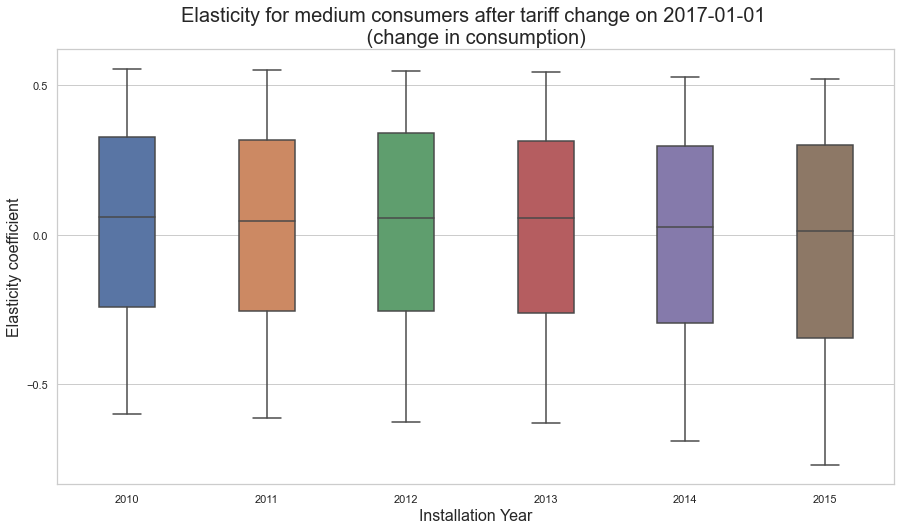

In [20]:
import matplotlib.ticker as ticker
var1 = 'medium'
var2 = 'consumption'
city = 'All districts'

sns.set(style = 'whitegrid',rc={'figure.figsize':(15,8)})
ax = sns.boxplot(data=df_elasticity, y = 'kWhs_elasticity', x='installation_year',
                 showfliers=False, whis=(10,90), width=0.4)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_xlabel('Installation Year', fontsize=16)
ax.set_ylabel('Elasticity coefficient', fontsize=16)
ax.set_title(f'Elasticity for {var1} consumers after tariff change on {tariff_date} \n (change in {var2}) ', fontsize=20);

# File samples

## File 1

In [19]:
pdList = [combined_low_df, combined_medium_df, combined_high_df]  # List of your dataframes
combined_df = pd.concat(pdList)

In [24]:
df_list = df.meter_serial_number_consumer_id.unique().tolist()

In [25]:
combined_list = combined_df.meter_serial_number_consumer_id.unique().tolist()

In [26]:
len(df_list)

790709

In [27]:
len(np.setdiff1d(df_list,combined_list).tolist())

464552

In [175]:
len(np.setdiff1d(df_list,combined_list).tolist())

80101

In [18]:
combined_df.head()

,meter_serial_number_consumer_id,kWhs,trans_period,installation_year,avg_kWh,amounts,consumption_class
0,4226691659_157450,2.036364,2013-01-31,2010,9.725,269.818182,LOW
1,4226691659_157450,7.163636,2014-01-31,2010,9.725,962.545455,LOW
2,4226691659_157450,9.763636,2015-01-31,2010,9.725,1309.272727,LOW
3,4226691659_157450,4.563636,2016-01-31,2010,9.725,829.909091,LOW
4,4226691659_157450,13.454545,2018-01-31,2010,9.725,1200.181818,LOW


In [20]:
%%time
# Variables
tariff_date_1 = datetime.date(2015, 9, 1)  # 1st tariff change
tariff_date_2 = datetime.date(2017, 1, 1)  # 2nd tariff change
tariff_date = tariff_date_1
one_year = 1
six_months = 0.5
period = one_year
time_period = datetime.timedelta(days=(period*365))
before_tariff = (tariff_date - time_period).strftime('%Y-%m-%d')
after_tariff = (tariff_date + time_period).strftime('%Y-%m-%d')
dist_meta = meta_df[['meter_serial_number_consumer_id',
                     'district']]

# Select transactions six month prior and after tariff change
result1 = combined_df[(combined_df.trans_period > before_tariff)
                  & (combined_df.trans_period < after_tariff)]

# Merge with meta data (installation dates and districts)
tariff_df = pd.merge(result1, dist_meta,
                   on='meter_serial_number_consumer_id', how='left')
# exclude customers installed in tarrif year
tariff_df = tariff_df[~(tariff_df['installation_year'].isin([tariff_date.year, tariff_date.year+1]))]
os.system('say "Your program has now finished"')

CPU times: user 2.17 s, sys: 978 ms, total: 3.15 s
Wall time: 6.38 s


0

In [22]:
len(tariff_df)

3288605

In [34]:
tariff_df.head()

,meter_serial_number_consumer_id,kWhs,trans_period,installation_year,avg_kWh,amounts,consumption_class,district
0,4226691659_157450,9.763636,2015-01-31,2010,9.725,1309.272727,LOW,[MUHANGA]
1,4226691659_157450,4.563636,2016-01-31,2010,9.725,829.909091,LOW,[MUHANGA]
2,4226691659_157450,10.800000,2015-02-28,2010,9.725,1441.000000,LOW,[MUHANGA]
3,4226691659_157450,7.427273,2016-02-28,2010,9.725,1351.181818,LOW,[MUHANGA]
4,4226691659_157450,10.311111,2015-03-31,2010,9.725,1366.222222,LOW,[MUHANGA]


In [23]:
balanced_df = tariff_df.groupby(['meter_serial_number_consumer_id','trans_period'])['kWhs'].count().unstack()

In [24]:
len(balanced_df)

171473

In [25]:
balanced_df.dropna(inplace = True)
len(balanced_df)

82466

In [26]:
balanced_ids = balanced_df.index.values.tolist()
len(balanced_ids)

82466

In [27]:
tariff_df_balanced = tariff_df[tariff_df.meter_serial_number_consumer_id.isin(balanced_ids)]
len(tariff_df_balanced)

1896718

In [29]:
tmp = tariff_df_balanced[tariff_df_balanced.consumption_class=='LOW']
tmp.meter_serial_number_consumer_id.nunique()

37504

In [30]:
%%time
csv_dir = '/Users/joelmugyenyi/Desktop/REG_CSV/_smoothed_data/'
filename = 'tariff1_consumers_bal_2_07_2021.csv'
tariff_df_balanced.to_csv(csv_dir+filename,index=False)
os.system('say "Your program has now finished"')

CPU times: user 1min 9s, sys: 931 ms, total: 1min 9s
Wall time: 1min 13s


0